# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


/Users/leahgaeta/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()
print df.count()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [4]:
temprank_df = pd.get_dummies(df['prestige'], prefix = 'prestige')
print temprank_df.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We need 3 class variables total since there are 4 ranks to prestige (4 - 1 = 3)

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [5]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(temprank_df.loc[:, 'prestige_1.0':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [6]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [7]:
Odds_Prestige_1 = 33.0/28
print Odds_Prestige_1

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [8]:
Prestige_234_Admit = 53.0+28+12
Prestige_234_NoAdmit = 95.0+93+55
Odds_Prestige_234 = Prestige_234_Admit/Prestige_234_NoAdmit
print Odds_Prestige_234

0.382716049383


#### 3.3 Calculate the odds ratio

In [9]:
odds_ratio = Odds_Prestige_1/Odds_Prestige_234
print odds_ratio

3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer: The odds ratio of 3.08 indicates that there is an association between coming from a Prestige_1 school and admission into UCLA, and that there is an increse in odds of admission from a Prestige_1 school to that which isn't Prestige_1.

#### 3.5 Print the cross tab for prestige_4

In [10]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


#### 3.6 Calculate the OR 

In [11]:
Odds_Prestige_4 = 12.0/55
print Odds_Prestige_1/Odds_Prestige_4

5.40178571429


#### 3.7 Write this finding in a sentence

Answer: The odds ratio of admission comparing Prestige_1 applicants to Prestige_4 (5.40) suggests that applicants coming from a Prestige_1 school have higher odds of acceptance compared to that of an applicant from Prestige_4.

## Part 4. Analysis

In [89]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(temprank_df.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [90]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [91]:
train_cols = data.columns[1:]

In [92]:
train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')

#### 4.2 Fit the model

In [16]:
logit = sm.Logit(data['admit'], data[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [17]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Dec 2017   Pseudo R-squ.:                 0.08166
Time:                        14:44:38   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [18]:
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [19]:
# odds ratios and 95% CI
parameters = result.params
conf = result.conf_int()
conf['OR'] = parameters
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being admitted from a Prestige_2 school are lower than that of a Prestige_1. Numerically, this tells us that the odds of admission decreased by 51% when coming from a Prestige_2 school versus a Prestige_1.

#### 4.6 Interpret the OR of GPA

Answer: Odds of admission increase with higher gpas.  A higher gpa does not guarantee admission but it improves the odds of admission when GPA is closer to 4.0

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [106]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [107]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [108]:
# recreate the dummy variables
#new_df = pd.get_dummies(df['prestige'], prefix = 'prestige')
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
new_dummy = pd.get_dummies(combos['prestige'], prefix='prestige')
new_dummy.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

# keep only what we need for making predictions
new_cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[new_cols_to_keep].join(new_dummy.loc[:, 'prestige_2.0':])
print combos.head()

     gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
0  220.0  2.260000       1.0        1.0             0             0   
1  220.0  2.260000       2.0        1.0             1             0   
2  220.0  2.260000       3.0        1.0             0             1   
3  220.0  2.260000       4.0        1.0             0             0   
4  220.0  2.453333       1.0        1.0             0             0   

   prestige_4.0  
0             0  
1             0  
2             0  
3             1  
4             0  


In [110]:
#combos['intercept'] = 1.0 #this adds new column automatically to the end
print 'prestige_2' in combos.columns

False


#### 5.2 Make predictions on the enumerated dataset

In [109]:
combos['admit_pred'] = result.predict(combos[train_cols])
print combos.head()
print combos.tail()

     gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
0  220.0  2.260000       1.0        1.0             0             0   
1  220.0  2.260000       2.0        1.0             1             0   
2  220.0  2.260000       3.0        1.0             0             1   
3  220.0  2.260000       4.0        1.0             0             0   
4  220.0  2.453333       1.0        1.0             0             0   

   prestige_4.0  admit_pred  
0             0    0.164173  
1             0    0.090492  
2             0    0.048977  
3             1    0.039890  
4             0    0.185907  
       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0             0             0   
396  800.0  4.000000       1.0        1.0             0             0   
397  800.0  4.000000       2.0        1.0             1             0   
398  800.0  4.000000       3.0        1.0             0             1   
399  800.0  4.000000       4

#### 5.3 Interpret findings for the last 4 observations

Answer: We can see that the probability of admission decreases with decreasing prestige of undergraduate school and that probability of admission increases significantly with higher gpa and gre scores.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

/Users/leahgaeta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


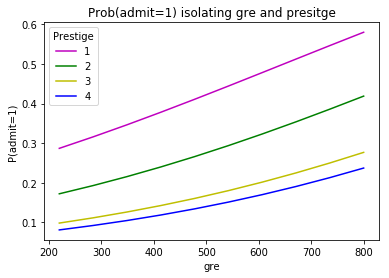

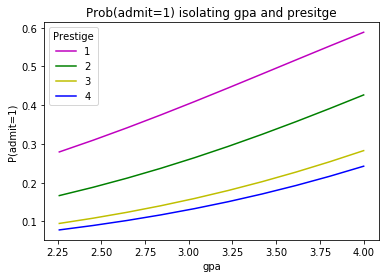

In [113]:
  def isolate_and_plot(variable):
      grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                  aggfunc=np.mean)
      colors = 'bmgybmgy'
      for col in combos.prestige.unique():
          plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
          pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])

      pl.xlabel(variable)
      pl.ylabel("P(admit=1)")
      pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
      pl.title("Prob(admit=1) isolating " + variable + " and presitge")
      pl.show()

  isolate_and_plot('gre')
  isolate_and_plot('gpa')
